---------

# Tarea 1

## Problema 1

El objetivo de las bases es que realicemos un modelo de clasificación para poder contestar la siguiente pregunta:

      ¿Damos un crédito bancario o no?

Para empezar con la exploración de la base, tendrán que generar un análisis descriptivo de la información que les compartiré:

 - 1.- Los campos _id_ que son los identificadores de la información.
 - 2.- base_ini_interna (csv)
 - 3.- base_ini_parte1 (csv)
 - 4.- base_ini_externa (txt)
 - 5.- bases de comportamiento ( 2 txt, 3 csv )
 - 6.- base_inversión, es una variable simulada de una gamma (txt), es
 - 7.- Cuando una variable es categórica, está implícito en el nombre de la base. No tenemos un diccionario, simplemente que son categóricas.
 - 8.- El resto entonces son continuas. Es decir, los nombre estám enmascarados, ni siquiera yo sé qué significan.
 

¿Cómo hago los cruces? Exploren la información.

¿Qué análisis puedo realizar? Exploren ustedes, apóyense de los comportamientos de los ids.

Pero... ¿Las preguntas son abiertas? Así es, quiero que exploren. Hay bases que vienen en csv y otras en txt. Vean como tratarlas.

----

El resto de las tarea, son las preguntas que les dejé el dìa miércoles. Les coparto los programas que utilizamos.
Pero resumo un poco:

----

## Problema 2

De la base data_schools sacar obtener el error estándar con Bootstrap de las variables de la base. 
Recordemos que tienen que simular N Muestras Boostrap con tamño n. Luego, el otro ejercicio es que lo hagan con n-1.


## Problema 3

Calcular el eror estándar de las betas del modelo lineal, les expliqué la idea de este problema

-------
----------
## Problema 1

------
Importamos nuestras librerias

------

In [1]:
%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np 
import matplotlib as mpl
import collections as cl

sns.set_style('white')

from IPython.core.display import HTML
HTML(""" <style>
         .output_png { display: table-cell;
                       text-align: center;
                       vertical-align: middle;
                     }
         </style>
     """)

------
Cargamos nuestras bases

------

In [2]:
df1 = pd.read_csv('base_ini_interna.csv')
df2 = pd.read_csv('base_ini_parte1.csv')
df3 = pd.read_csv('base_ini_externa.txt', sep = " ")
df4 = pd.read_csv('base_comportamiento_2.txt', sep = " ")
df5 = pd.read_csv('base_comportamiento_3.csv')
df6 = pd.read_csv('base_inversion.txt', sep = " ")

Visualizamos los primeros renglones

In [3]:
display(df1.head(2))
display(df2.head(2))
display(df3.head(2))
display(df4.head(2))
display(df5.head(2))
display(df6.head(2))

,_id_,fecha_inicio,comp_interno1,comp_interno2,comp_interno3,comp_interno4,categoria1,categoria2,categoria3
0,78213,2020-03-25,0.0,b'0',11.0,58.0,2.0,9.0,156.0
1,76457,2020-02-13,0.0,b'1',28.0,45.0,1.0,4.0,173.0


,_id_,_id2_,comp_mixto1
0,78213,1798899,0.33522
1,76457,1758511,0.33334


,_id_,comp_externo1,comp_externo2,comp_externo3,comp_externo4
0,78213,260.869565,25.854639,56.0,-230.0
1,76457,40.579710,2.872738,62.0,-230.0


,num_caso,mes_informacion,Tiempo_aparicion
0,1,2016-04-01 00:00:00,0.0
1,1,2016-05-01 00:00:00,1.0


,num_caso,mes_informacion,comportamiento_j
0,1,2016-04-01 00:00:00,0.0
1,1,2016-05-01 00:00:00,0.0


,_id2_,inversion
0,1758511,0.041039
1,1572947,77.422135


------
Observemos los datos únicos de cada tabla y si hay duplicados

------

In [4]:
lst = [df1, df2, df3, df4, df5, df6]
for i, lt in enumerate(lst):
    print(f'Datos brutos tabla {i + 1:0>2}             : {lt.shape[0]: >10,}')
    if '_id_' in lt.columns:
        print(f'Datos unicos en _id_ tabla {i + 1:0>2}     : {lt._id_.unique().size : >10,}')
    elif 'num_caso' in lt.columns:
        print(f'Datos unicos en num_caso tabla {i + 1:0>2} : {lt.num_caso.unique().size : >10,}')
    else:
        print(f'Datos unicos en _id2_ tabla {i + 1:0>2}    : {lt._id2_.unique().size : >10,}')
    
    print('\n')

Datos brutos tabla 01             :     50,000
Datos unicos en _id_ tabla 01     :     50,000


Datos brutos tabla 02             :     50,000
Datos unicos en _id_ tabla 02     :     50,000


Datos brutos tabla 03             :     50,000
Datos unicos en _id_ tabla 03     :     50,000


Datos brutos tabla 04             :  1,455,536
Datos unicos en num_caso tabla 04 :     49,352


Datos brutos tabla 05             :  1,455,536
Datos unicos en num_caso tabla 05 :     49,352


Datos brutos tabla 06             :     17,536
Datos unicos en _id2_ tabla 06    :     17,536




------
Ahora haremos la respectivas uniones de las tablas y haremos un análisis de cada una.

------

In [5]:
tabla = df1.merge(df2, on = '_id_')
tabla = tabla.merge(df3, on = '_id_')

tabla = tabla.merge(df6, on = '_id2_', how = 'left')
tabla_comp = pd.concat([df4, df5], join = 'inner', axis = 1)
tabla_comp = tabla_comp.iloc[:, [0,1,2,5]]

In [6]:
display(tabla.head())
display(tabla_comp.head())

,_id_,fecha_inicio,comp_interno1,comp_interno2,comp_interno3,comp_interno4,categoria1,categoria2,categoria3,_id2_,comp_mixto1,comp_externo1,comp_externo2,comp_externo3,comp_externo4,inversion
0,78213,2020-03-25,0.000000,b'0',11.0,58.0,2.0,9.0,156.0,1798899,0.33522,260.869565,25.854639,56.0,-230.0,NaN
1,76457,2020-02-13,0.000000,b'1',28.0,45.0,1.0,4.0,173.0,1758511,0.33334,40.579710,2.872738,62.0,-230.0,0.041039
2,40666,2018-01-24,0.000000,b'1',25.0,45.0,1.0,9.0,170.0,935318,0.29186,NaN,NaN,119.0,-230.0,NaN
3,8329,2016-10-07,0.000000,b'1',14.0,59.0,3.0,3.0,159.0,191567,0.29112,349.275362,34.616490,94.0,-230.0,NaN
4,68389,2019-07-30,2026.342452,b'1',1.0,67.0,2.0,9.0,146.0,1572947,0.27318,276.811594,27.434645,125.0,-230.0,77.422135


,num_caso,mes_informacion,Tiempo_aparicion,comportamiento_j
0,1,2016-04-01 00:00:00,0.0,0.0
1,1,2016-05-01 00:00:00,1.0,0.0
2,1,2016-06-01 00:00:00,2.0,0.0
3,1,2016-07-01 00:00:00,3.0,0.0
4,1,2016-08-01 00:00:00,4.0,0.0


------
Trabajaremos con la tabla de comportamiento 2 y 3 para generar nuestro target

------

Para ello, primero analizaremos el tiempo de vida que aparece un cliente en el sistema. Es decir, haremos el análisis en la columna de 'Tiempo_aparicion'.

In [7]:
tiempo_vida = tabla_comp.groupby(['num_caso'])['Tiempo_aparicion'].max()
tiempo_vida.min(), tiempo_vida.max()

(0.0, 64.0)

------
Notamos que hay clientes que aparecen una vez y otros hasta 64 veces o bien meses.

------

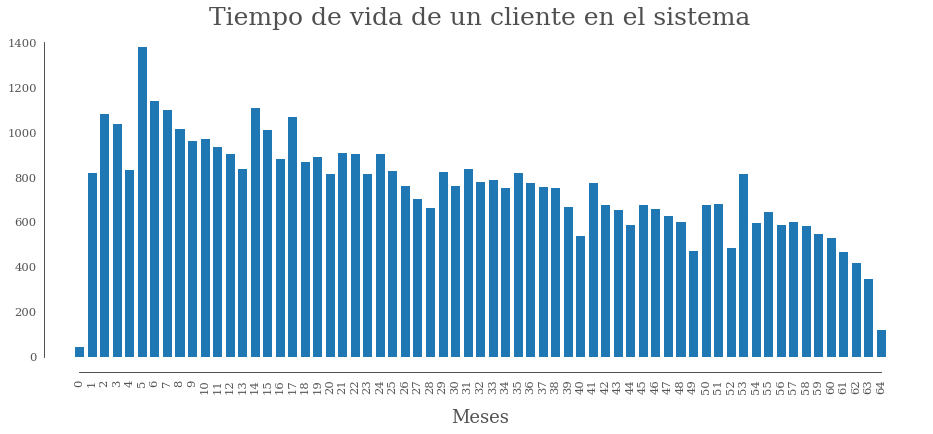

Tiempo de vida promedio de un cliente en el sistema:  28.128566218187714


In [8]:
w = cl.Counter(tiempo_vida)
w.most_common()

fig, ax = plt.subplots(figsize=(16, 6))

bar = ax.bar(w.keys(), w.values())

plt.title('Tiempo de vida de un cliente en el sistema', color = '#4f4f4f', fontsize = 25, 
             fontfamily = 'serif')

plt.xticks(np.arange(0,65))

plt.xlabel('Meses', fontsize = 18, fontfamily = 'serif', color = '#525252', labelpad = 15)

sns.despine(offset = {'bottom' : 15, 'left' : -10}, trim = True)
plt.xticks(fontsize = 11.5, fontfamily = 'serif', color = '#525252', rotation = 90)
plt.yticks(fontsize = 11.5, fontfamily = 'serif', color = '#525252')
plt.show()
print('Tiempo de vida promedio de un cliente en el sistema: ', tiempo_vida.mean())

-----
Debemos tomar una ventana de tiempo, pues no todos los clientes aparecen 64 meses, pero observemos que no se acumula del todo en una parte, sin embargo, la densidad está un poco más cargada a la izquierda, así que tomaremos la media como el límite de las personas a considerar en nuestro análisis. En este caso tomaremos como nuestra ventana de 0 a 29. 

Además, lo que haremos es tomar en cuenta cuantas veces aparece en comportamiento diferente de 0, pues significa que el cliente no cumplió cierto cumplimiento con la empresa. 

El análisis ahora irá sobre la columna comportamiento_j

-----

In [9]:
aux = tabla_comp[(tabla_comp.Tiempo_aparicion <= 29) & (tabla_comp.comportamiento_j > 0)]
comp = aux.groupby(['num_caso'])['comportamiento_j'].count()
del aux
comp.min(), comp.max()

(1, 28)

-----
Aquí observamos que hay personas que no cumplieron al menos una vez y otros hasta 28 veces

-----

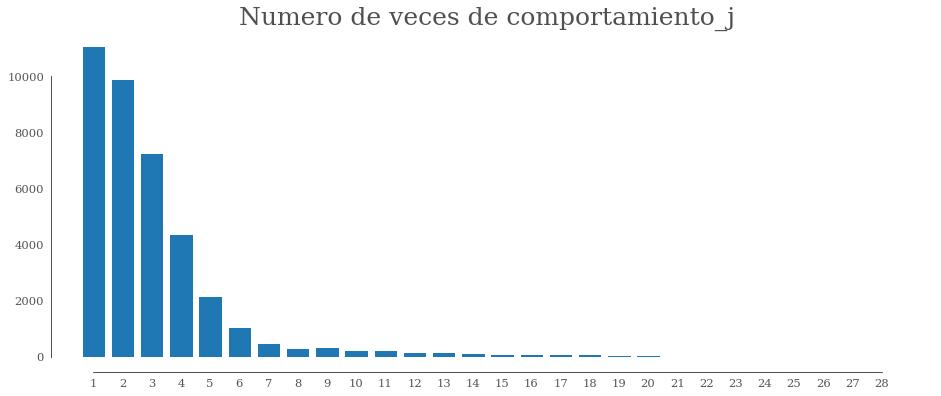

Numero de veces de comportamiento_j promedio :  3.0923447953944296


In [10]:
w = cl.Counter(comp)
w.most_common()

fig, ax = plt.subplots(figsize=(16, 6))

bar = ax.bar(w.keys(), w.values())

plt.title('Numero de veces de comportamiento_j', color = '#4f4f4f', fontsize = 25, 
             fontfamily = 'serif')

plt.xticks(np.arange(1,29))
sns.despine(offset = {'bottom' : 15, 'left' : -10}, trim = True)
plt.xticks(fontsize = 11.5, fontfamily = 'serif', color = '#525252')
plt.yticks(fontsize = 11.5, fontfamily = 'serif', color = '#525252')
plt.show()
print('Numero de veces de comportamiento_j promedio : ', comp.mean())

-----
Cuando graficamos este comportamiento respeco a nuestra ventana de tiempo de 0 a 29 meses y observando cuantas veces las personas no cumplieron pues se ve como si tuvieran una forma exponencial, una forma bonita porque se concentra la mayor información del lado izquierdo. Aquí en lugar de tomar la media tomaremos el percentil 90%.

-----

In [11]:
#Tomaremos el percentile de 90 para establecer un umbral de si otorgamos o no un crédito
np.percentile(comp, 90)

5.0

-----
Nos arroja un valor de 5.


Es decir, que las personas que tengan un conteo de comportamiento_j menor a 5 durante 
TODO el tiempo de vida, se le otorgara un credito, en caso contrario NO se le otorgará

-----

Una vez hecho nuestro análisis y que hemos encontrado nuestro umbral para clasificar pues definiremos una 
funcion que nos calisificará este comportamiento descrito arriba. 

-----

In [12]:
def otorgacion_credito(x):
    if x.shape[0]> 5:
        return int(0)
    else:
        return int(1)

In [13]:
aux = tabla_comp[(tabla_comp.comportamiento_j > 0)]
credito = aux.groupby(['num_caso'])['comportamiento_j'].apply(otorgacion_credito)
del aux
credito.head()

num_caso
1     0
7     0
8     1
10    1
14    0
Name: comportamiento_j, dtype: int64

-----
¡Eureka! Hemos obtenido nuestro target, ahora lo uniremos con la tabla que hemos construido anteriormente, y eliminaremos
las tablas que hemos utilizado para liberar memoria

-----

In [14]:
oto_credito  = pd.DataFrame(credito.values, columns = ['Otorgación_credito'])
oto_credito['_id_'] = credito.index
oto_credito.head()

,Otorgación_credito,_id_
0,0,1
1,0,7
2,1,8
3,1,10
4,0,14


In [15]:
tabla_limpia = pd.merge(tabla, oto_credito, how = 'inner', on = '_id_')
del tabla, oto_credito, tabla_comp
tabla_limpia.head()

,_id_,fecha_inicio,comp_interno1,comp_interno2,comp_interno3,comp_interno4,categoria1,categoria2,categoria3,_id2_,comp_mixto1,comp_externo1,comp_externo2,comp_externo3,comp_externo4,inversion,Otorgación_credito
0,78213,2020-03-25,0.000000,b'0',11.0,58.0,2.0,9.0,156.0,1798899,0.33522,260.869565,25.854639,56.0,-230.0,NaN,1
1,76457,2020-02-13,0.000000,b'1',28.0,45.0,1.0,4.0,173.0,1758511,0.33334,40.579710,2.872738,62.0,-230.0,0.041039,1
2,40666,2018-01-24,0.000000,b'1',25.0,45.0,1.0,9.0,170.0,935318,0.29186,NaN,NaN,119.0,-230.0,NaN,1
3,68389,2019-07-30,2026.342452,b'1',1.0,67.0,2.0,9.0,146.0,1572947,0.27318,276.811594,27.434645,125.0,-230.0,77.422135,1
4,45732,2018-07-27,3546.099291,b'1',15.0,70.0,1.0,9.0,160.0,1051836,0.32988,640.579710,63.487504,81.0,-230.0,90.539953,1


-----
Observemos cuantos valores nulos tenemos y que información podemos podemos rellenar

-----

In [16]:
print(tabla_limpia.shape)
print('-'*50)

tabla_limpia.info()

(39407, 17)
--------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
Int64Index: 39407 entries, 0 to 39406
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   _id_                39407 non-null  int64  
 1   fecha_inicio        39407 non-null  object 
 2   comp_interno1       39407 non-null  float64
 3   comp_interno2       39407 non-null  object 
 4   comp_interno3       39407 non-null  float64
 5   comp_interno4       39407 non-null  float64
 6   categoria1          39407 non-null  float64
 7   categoria2          39407 non-null  float64
 8   categoria3          39407 non-null  float64
 9   _id2_               39407 non-null  int64  
 10  comp_mixto1         39407 non-null  float64
 11  comp_externo1       37565 non-null  float64
 12  comp_externo2       34740 non-null  float64
 13  comp_externo3       39402 non-null  float64
 14  comp_externo4       39407 non-null  flo

-----
Veamos que podemos rellenar en inversión los NA por 0 pues signiifica que no tuvieron inversión.
Después de ahí eliminaremos los valores Nan's de las demás columna, pues desconocemos que signifiquen y no podremos
rellenarlas.

-----

In [17]:
tabla_limpia['inversion'] = tabla_limpia.inversion.fillna(0)
tabla = tabla_limpia.dropna()

In [18]:
tabla.describe()

,_id_,comp_interno1,comp_interno3,comp_interno4,categoria1,categoria2,categoria3,_id2_,comp_mixto1,comp_externo1,comp_externo2,comp_externo3,comp_externo4,inversion,Otorgación_credito
count,34731.000000,34731.000000,34731.000000,34731.000000,34731.000000,34731.000000,34731.000000,3.473100e+04,34731.000000,3.473100e+04,34731.000000,34731.000000,3.473100e+04,34731.000000,34731.000000
mean,42873.839596,1045.034059,14.670410,56.528577,1.835450,8.002764,159.670410,9.860983e+05,0.339226,6.854142e+02,35.095506,88.161441,1.842711e+07,65.766657,0.786502
std,25300.968659,4318.366587,8.829472,9.992042,0.944815,2.049754,8.829472,5.819223e+05,0.037451,2.063677e+04,37.665199,59.498592,4.288813e+08,653.293558,0.409782
min,1.000000,0.000000,1.000000,25.000000,1.000000,1.000000,146.000000,2.300000e+01,0.204760,2.898551e-03,0.000287,-608.000000,-2.300000e+02,0.000000,0.000000
25%,21186.500000,0.000000,8.000000,48.000000,1.000000,7.000000,153.000000,4.872895e+05,0.317900,1.391304e+02,11.490951,72.000000,-2.300000e+02,0.000000,1.000000
50%,42109.000000,0.000000,15.000000,55.000000,2.000000,9.000000,160.000000,9.685070e+05,0.348200,2.678261e+02,22.120080,98.000000,-2.300000e+02,0.000000,1.000000
75%,63379.000000,1013.171226,21.000000,64.000000,2.000000,9.000000,166.000000,1.457717e+06,0.370000,5.304348e+02,45.245619,119.000000,-2.300000e+02,8.606820,1.000000
max,97095.000000,281661.600811,32.000000,79.000000,6.000000,13.000000,177.000000,2.233185e+06,0.430060,2.898551e+06,861.821316,159.000000,1.000000e+10,95052.396733,1.000000


------
Notemos que nos quedamos con 34731 datos, esto es debido a que al momento de cruzar nuestro target y la tabla general pues había muchos _id_ que no coincidian por lo que se eliminan, no nos interesan _id_ donde desconocemos su comportamiento y no podemos fijarles una clasificación. Además de que eliminamos los NaN´s de los demás registros.

------
Ahora graficaremos algunas columnas, para observar si podemos encontrar cuales son las continuas y cuales las categoricas enmascaradas

------

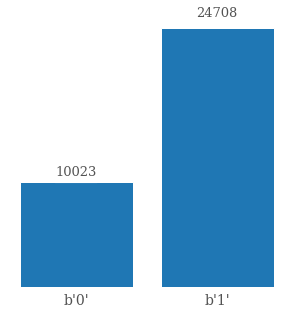

In [19]:
wc = cl.Counter(tabla['comp_interno2'])
x = wc.keys()
y = wc.values()

fig, ax = plt.subplots(figsize=(5, 5))

bar = ax.bar(wc.keys(), wc.values())

for a,b in zip(x, y):
    plt.annotate(str(b), xy = (a, b), 
                 color = '#525252',
                 bbox=dict(boxstyle = "round", 
                           facecolor = "white", 
                           #edgecolor = "red", 
                           #lw = 1
                          ),
                 fontsize = 13, xytext = (a, b + b*.03),
                 ha = 'center', #'center', 'right', 'left'
                 va = 'bottom', # 'top', 'bottom', 'center', 'baseline', 'center_baseline'
                 fontfamily = 'serif'
                 #fontweight = 'bold'
                )

ax.axes.yaxis.set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

plt.xticks(fontsize = 14, fontfamily = 'serif', color = '#525252')
#plt.tight_layout()
ax.tick_params(axis = 'x', color = 'w')

In [20]:
lst = tabla.columns
lst

Index(['_id_', 'fecha_inicio', 'comp_interno1', 'comp_interno2',
       'comp_interno3', 'comp_interno4', 'categoria1', 'categoria2',
       'categoria3', '_id2_', 'comp_mixto1', 'comp_externo1', 'comp_externo2',
       'comp_externo3', 'comp_externo4', 'inversion', 'Otorgación_credito'],
      dtype='object')

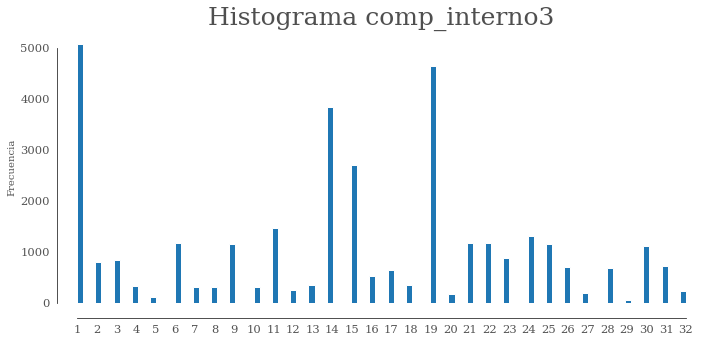

In [21]:
tabla[lst[4]].plot(kind = 'hist', bins = 100, figsize = (12,5))

plt.title('Histograma comp_interno3', color = '#4f4f4f', fontsize = 25, 
             fontfamily = 'serif')

x = np.arange(tabla[lst[4]].min() , tabla[lst[4]].max() + 1)

plt.ylabel('Frecuencia', fontfamily = 'serif', color = '#525252')
plt.xticks(x)

sns.despine(offset = {'bottom' : 15, 'left' : -10}, 
            trim = True)

plt.xticks(fontsize = 11.5, fontfamily = 'serif', color = '#525252')
plt.yticks(fontsize = 11.5, fontfamily = 'serif', color = '#525252')
plt.show()

----------
En esta grafica son 32 numeros, bien podrían ser los estados del pais. 

----------

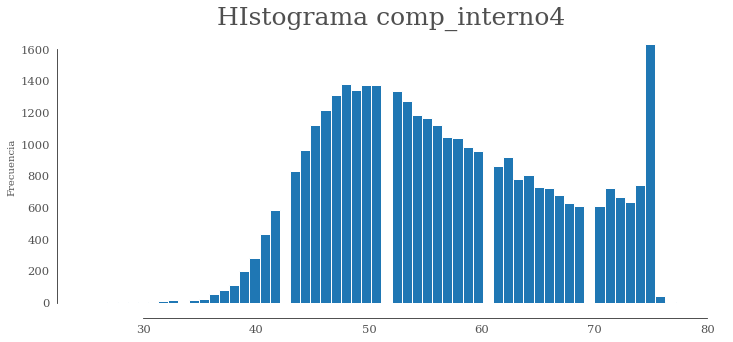

In [22]:
tabla[lst[5]].plot(kind = 'hist', 
                   bins = 60, # 50, 60, 70, 100 
                   figsize = (12,5))

plt.title('HIstograma ' + lst[5], color = '#4f4f4f', fontsize = 25, 
             fontfamily = 'serif')

plt.ylabel('Frecuencia', fontfamily = 'serif', color = '#525252')


sns.despine(offset = {'bottom' : 15, 'left' : 0}, 
            trim = True)

plt.xticks(fontsize = 11.5, fontfamily = 'serif', color = '#525252')
plt.yticks(fontsize = 11.5, fontfamily = 'serif', color = '#525252')
plt.show()

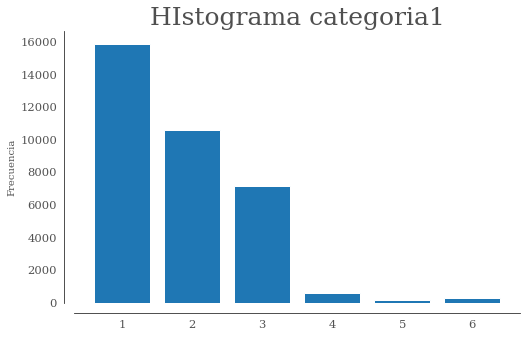

In [23]:
wc = cl.Counter(tabla[lst[6]])

fig, ax = plt.subplots(figsize=(8, 5))
bar = ax.bar(wc.keys(), wc.values())

plt.title('HIstograma ' + lst[6], color = '#4f4f4f', fontsize = 25, 
             fontfamily = 'serif')

plt.ylabel('Frecuencia', fontfamily = 'serif', color = '#525252')

sns.despine(offset = 10)

plt.xticks(fontsize = 11.5, fontfamily = 'serif', color = '#525252')
plt.yticks(fontsize = 11.5, fontfamily = 'serif', color = '#525252')
plt.show()

----------
Esta parece tener algún tipo de clasificación del 1 al 6

----------

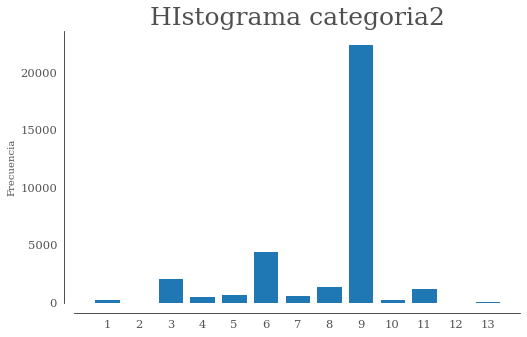

In [24]:
wc = cl.Counter(tabla[lst[7]])

fig, ax = plt.subplots(figsize=(8, 5))
bar = ax.bar(wc.keys(), wc.values())

plt.title('HIstograma ' + lst[7], color = '#4f4f4f', fontsize = 25, 
             fontfamily = 'serif')

plt.ylabel('Frecuencia', fontfamily = 'serif', color = '#525252')

x = np.arange(tabla[lst[7]].min() , tabla[lst[7]].max() + 1)
plt.xticks(x)

sns.despine(offset = 10)

plt.xticks(fontsize = 11.5, fontfamily = 'serif', color = '#525252')
plt.yticks(fontsize = 11.5, fontfamily = 'serif', color = '#525252')
plt.show()

--------
Y esta parece tener algún tipo de clasificación del 1 al 13

--------

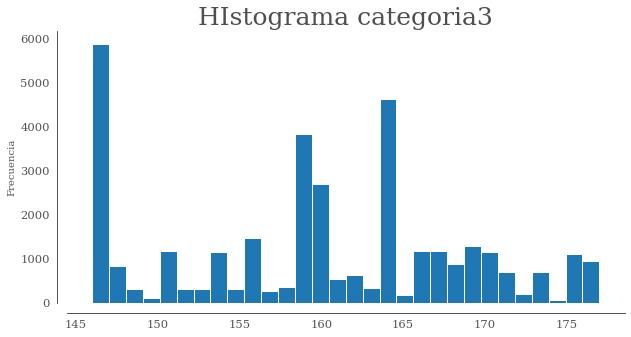

In [25]:
tabla[lst[8]].plot(kind = 'hist', 
                   bins = 30, # 50, 60, 70, 100 
                   figsize = (10,5),
                  )

plt.title('HIstograma ' + lst[8], color = '#4f4f4f', fontsize = 25, 
             fontfamily = 'serif')

plt.ylabel('Frecuencia', fontfamily = 'serif', color = '#525252')


sns.despine(offset = 10, 
            #trim = True
           )

plt.xticks(fontsize = 11.5, fontfamily = 'serif', color = '#525252')
plt.yticks(fontsize = 11.5, fontfamily = 'serif', color = '#525252')
plt.show()

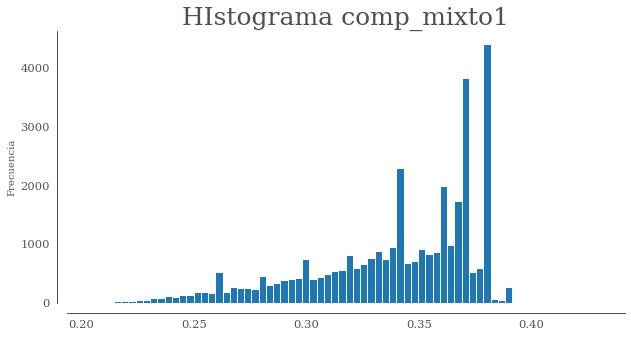

In [26]:
tabla[lst[10]].plot(kind = 'hist', 
                   bins = 70, # 50, 60, 70, 100 
                   figsize = (10,5))

plt.title('HIstograma ' + lst[10], color = '#4f4f4f', fontsize = 25, 
             fontfamily = 'serif')

plt.ylabel('Frecuencia', fontfamily = 'serif', color = '#525252')


sns.despine(offset = 10)

plt.xticks(fontsize = 11.5, fontfamily = 'serif', color = '#525252')
plt.yticks(fontsize = 11.5, fontfamily = 'serif', color = '#525252')
plt.show()

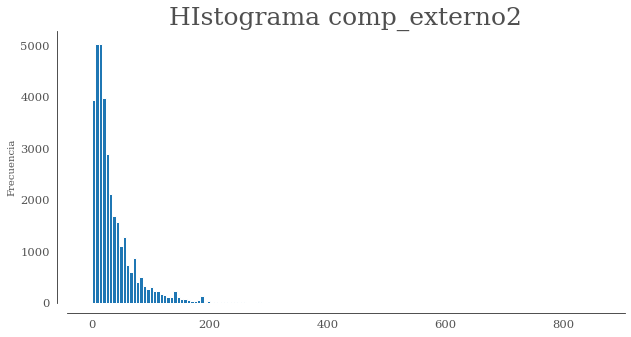

In [27]:
tabla[lst[12]].plot(kind = 'hist', 
                   bins = 150, # 50, 60, 70, 100 
                   figsize = (10,5))

plt.title('HIstograma ' + lst[12], color = '#4f4f4f', fontsize = 25, 
             fontfamily = 'serif')

plt.ylabel('Frecuencia', fontfamily = 'serif', color = '#525252')


sns.despine(offset = 10)

plt.xticks(fontsize = 11.5, fontfamily = 'serif', color = '#525252')
plt.yticks(fontsize = 11.5, fontfamily = 'serif', color = '#525252')
plt.show()

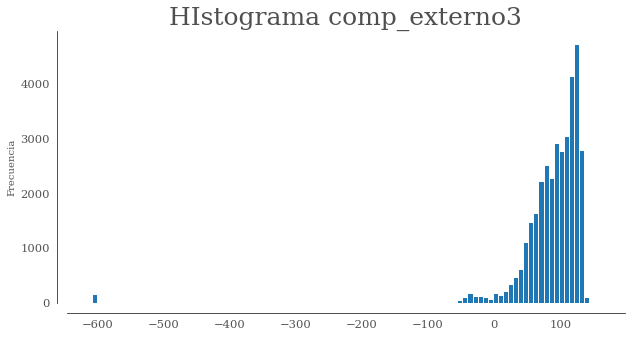

In [28]:
tabla[lst[13]].plot(kind = 'hist', 
                   bins = 100, # 50, 60, 70, 100 
                   figsize = (10,5))

plt.title('HIstograma ' + lst[13], color = '#4f4f4f', fontsize = 25, 
             fontfamily = 'serif')

plt.ylabel('Frecuencia', fontfamily = 'serif', color = '#525252')


sns.despine(offset = 10)

plt.xticks(fontsize = 11.5, fontfamily = 'serif', color = '#525252')
plt.yticks(fontsize = 11.5, fontfamily = 'serif', color = '#525252')
plt.show()

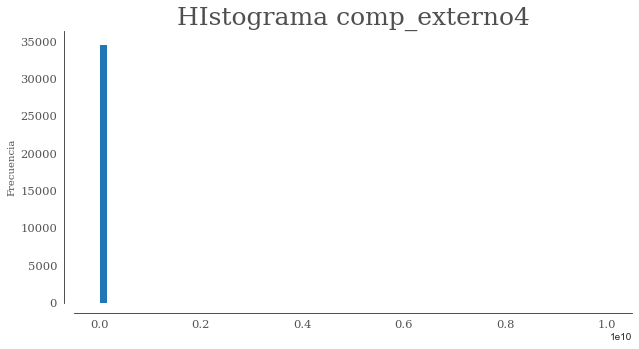

In [29]:
tabla[lst[14]].plot(kind = 'hist', 
                   bins = 70, # 50, 60, 70, 100 
                   figsize = (10,5))

plt.title('HIstograma ' + lst[14], color = '#4f4f4f', fontsize = 25, 
             fontfamily = 'serif')

plt.ylabel('Frecuencia', fontfamily = 'serif', color = '#525252')


sns.despine(offset = 10)

plt.xticks(fontsize = 11.5, fontfamily = 'serif', color = '#525252')
plt.yticks(fontsize = 11.5, fontfamily = 'serif', color = '#525252')
plt.show()

In [30]:
wc = cl.Counter(tabla[lst[14]])
wc.most_common()

[(-230.0, 31863),
 (-229.0, 2787),
 (9999999769.99, 64),
 (-228.0, 16),
 (-227.0, 1)]

---------
Esta grafica parece ser clasificacion de algo, pues solo se acumula en ciertos puntos. 
Esto también se observa en tabla de ``describe()`` que sus percentiles caen en el mismo número pero el maximo cae en otro.
Y por el conteo de este en la celda de arriba

---------

Al observar los datos de inversion cuando usamos el metodo ``decribe()`` , observamos que el percentil 75% está en el valor de 8.606820, y un maximo de 95052.396733, por lo qué restringiremos el dominio de la grafica pues se observa que tiene valores muy alejados del percentil 75%.

Esto también se puede observar a traves de un boxplot.
Además no graficaremos a aquellos que tengan inversion de 0 pues apalancan la grafica y no se llega a apreciar

-------

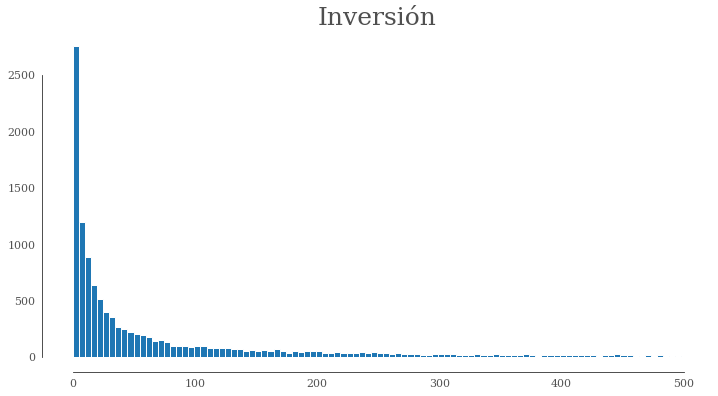

In [31]:
fig, ax = plt.subplots(figsize=(12, 6))
ax.hist(tabla[ (tabla['inversion'] > 0) & (tabla['inversion'] < 500) ].inversion, bins = 100)

sns.despine(offset = {'bottom' : 15, 'left' : 0}, 
            trim = True)

plt.title('Inversión', color = '#4f4f4f', fontsize = 25, 
             fontfamily = 'serif')

plt.xticks(fontsize = 11, fontfamily = 'serif', color = '#525252')
plt.yticks(fontsize = 11, fontfamily = 'serif', color = '#525252')
plt.show()

-------
Por ultimo gurdaremos la tabla

--------

In [32]:
#tabla.to_csv('Tabla_limpia.csv')

----------
----------

## Problema 2

De la base data_schools sacar obtener el error estándar con Bootstrap de las variables de la base. Recordemos que tienen que simular N Muestras Boostrap con tamño n. Luego, el otro ejercicio es que lo hagan con n-1.


- De tarea, obtener el error estandar de la correlacion y mostrar para que N la precisión con respecto a la correlación de la muestra total
- Grafique los histogramas de las correlaciones
- Grafique el  histograma pero sobre una muestra bostrap considerando la muestra completa

In [33]:
import pandas as pd
import numpy as np

x = np.linspace(0,1, 6)

bd_escuelas = pd.read_excel('data_schools.xlsx')

In [34]:
#Seleccionamos aleatoriamente 15 escuelas
escuelas_random = bd_escuelas.sample(n = 15)[["escuela"]]
escuelas_random["f_seleccion"]=1

bd_escuelas=pd.merge(bd_escuelas, escuelas_random, how="left", on=["escuela"])
bd_escuelas["f_seleccion"]=bd_escuelas["f_seleccion"].fillna(0)
bd_escuelas["f_seleccion"]=bd_escuelas["f_seleccion"].astype(int)

bd_escuelas

,escuela,LSAT,GPA,f_seleccion
0,1,622,3.23,0
1,2,542,2.83,1
2,3,579,3.24,0
3,4,653,3.12,0
4,5,606,3.09,0
...,...,...,...,...
77,78,590,3.15,0
78,79,558,2.81,0
79,80,611,3.16,1
80,81,564,3.02,0


### Consideraremos solo la muestra para estimar la correlación

In [35]:
tabla = bd_escuelas[bd_escuelas["f_seleccion"] == 1][['LSAT', 'GPA']]
tabla

,LSAT,GPA
1,542,2.83
9,607,2.91
20,546,2.99
24,662,3.39
25,627,3.41
30,605,3.13
34,578,3.03
36,615,3.37
41,575,2.92
49,555,3.00


--------
Haremos bootstrap sobre la **correlación de Pearson**  y lo haremos respecto a 100, 10,000  muestras bootstrap. Y después calculartemos el Error Estandar de la correlación

--------

Podemos obtener el error estándar del estimador de la siguiente manera
$$
\begin{equation}
\widehat{se}_{\rho} = \frac{1 - \widehat{corr}^{2}}{ \sqrt{(n-3)}}
\end{equation}
$$

**Bootstrap con 100 muestras**

------

In [36]:
k = 100    # 100 mueestras bootstrap

corr = np.zeros(k)

for j in range(k):
    corr[j] = tabla.sample(tabla.shape[0], replace = True).corr().values[0,1]

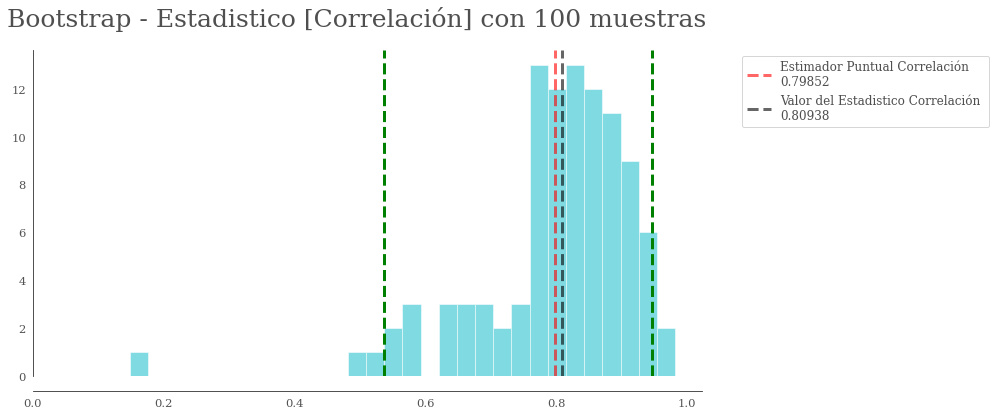

Promedio de la Muestra Bootstrap Correlación            =  0.79852
Valor del Estadistico Correlación                       =  0.80938
Desviación Estandar de la Muestra Bootstrap Correlación =  0.10461
Intervalo de Confianza                                  =  (0.53675, 0.94607)


In [37]:
fig, ax = plt.subplots(figsize=(12, 6))
ax.hist(corr, bins = 30, color = '#02B6C7', alpha = .5)

sns.despine(offset = {'bottom' : 15, 'left' : 0}, trim = False)

plt.suptitle('Bootstrap - Estadistico [Correlación] con 100 muestras', color = '#4f4f4f', fontsize = 25, 
             fontfamily = 'serif')

est_puntual = np.mean(corr)
plt.axvline(est_puntual, linestyle="--",color = "red", linewidth=3, alpha=0.6, 
            label = f"Estimador Puntual Correlación \n{est_puntual:.5f}")

val_est = tabla.corr().values[0,1]

plt.axvline(val_est, linestyle="--",color = "black", linewidth = 3, alpha=0.6, 
            label = f"Valor del Estadistico Correlación \n{val_est:.5f}")

plt.axvline(np.percentile(corr,2.5),color = "green", linestyle="--", linewidth = 3)                                                                                                                                                    
plt.axvline(np.percentile(corr,97.5),color = "green", linestyle="--", linewidth = 3) 

plt.xticks(x, fontsize = 11.5, fontfamily = 'serif', color = '#525252')
plt.yticks(fontsize = 11.5, fontfamily = 'serif', color = '#525252')

leg = plt.legend(fontsize = 12, bbox_to_anchor=(1.05, 1))
for i in range(2):
    leg.texts[i].set_color('#4f4f4f')
    leg.texts[i].set_family('serif')

plt.show()

print(f"Promedio de la Muestra Bootstrap Correlación            = {est_puntual: .5f}")
print(f"Valor del Estadistico Correlación                       = {val_est: .5f}")
print(f'Desviación Estandar de la Muestra Bootstrap Correlación = {(1 - est_puntual**2)/np.sqrt(tabla.shape[0] - 3): .5f}')
print(f'Intervalo de Confianza                                  =  ({np.percentile(corr,2.5):.5f},{np.percentile(corr,97.5): .5f})')

------
**Bootstrap con 10,000 muestras**

------

In [38]:
k = 10000    # 5,000 mueestras bootstrap

corr_2 = np.zeros(k)

for j in range(k):
    corr_2[j] = tabla.sample(tabla.shape[0], replace = True).corr().values[0,1]

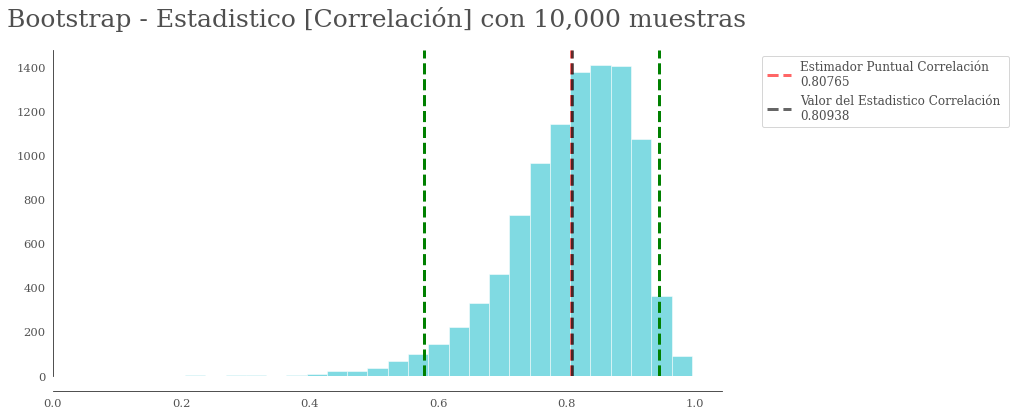

Promedio de la Muestra Bootstrap Correlación       =  0.80765
Valor del Estadistico Correlación                  =  0.80938
Error Estandar de la Muestra Bootstrap Correlación =  0.10037
Intervalo de Confianza                             =  (0.57747, 0.94474)


In [39]:
fig, ax = plt.subplots(figsize=(12, 6))
ax.hist(corr_2, bins = 30, color = '#02B6C7', alpha = .5)

sns.despine(offset = {'bottom' : 15, 'left' : 0}, 
            trim = False)

plt.suptitle('Bootstrap - Estadistico [Correlación] con 10,000 muestras', color = '#4f4f4f', fontsize = 25, 
             fontfamily = 'serif')

est_puntual = np.mean(corr_2)
plt.axvline(est_puntual, linestyle="--",color = "red", linewidth=3, alpha=0.6, 
            label = f"Estimador Puntual Correlación \n{est_puntual:.5f}")

val_est = tabla.corr().values[0,1]

plt.axvline(val_est, linestyle="--",color = "black", linewidth = 3, alpha=0.6, 
            label = f"Valor del Estadistico Correlación \n{val_est:.5f}")

plt.axvline(np.percentile(corr_2,2.5),color = "green", linestyle="--", linewidth = 3)                                                                                                                                                    
plt.axvline(np.percentile(corr_2,97.5),color = "green", linestyle="--", linewidth = 3) 

plt.xticks(x, fontsize = 11.5, fontfamily = 'serif', color = '#525252')
plt.yticks(fontsize = 11.5, fontfamily = 'serif', color = '#525252')

leg = plt.legend(fontsize = 12, bbox_to_anchor = (1.05, 1))

for i in range(2):
    leg.texts[i].set_color('#4f4f4f')
    leg.texts[i].set_family('serif')

plt.show()

print(f"Promedio de la Muestra Bootstrap Correlación       = {np.mean(corr_2): .5f}")
print(f"Valor del Estadistico Correlación                  = {val_est: .5f}")
print(f'Error Estandar de la Muestra Bootstrap Correlación = {(1 - est_puntual**2)/np.sqrt(tabla.shape[0] - 3): .5f}')
print(f'Intervalo de Confianza                             =  ({np.percentile(corr_2,2.5):.5f},{np.percentile(corr_2,97.5): .5f})')

------
Mientras haciamos multiples simulaciones notamos que había ocaciones que la muestra de 100 bootstrap caía muy cerca del estimador puntual de la correlación de la muestra de 15. Además de que el error estandar de la correlación bajó en la muestra de 10,000   

------

### Ahora sobre la población 

In [40]:
k = 100    # 20,000 mueestras bootstrap

corr_3 = np.zeros(k)

for j in range(k):
    corr_3[j] = bd_escuelas.sample(bd_escuelas.shape[0], replace = True)[['LSAT', 'GPA']].corr().values[0,1]

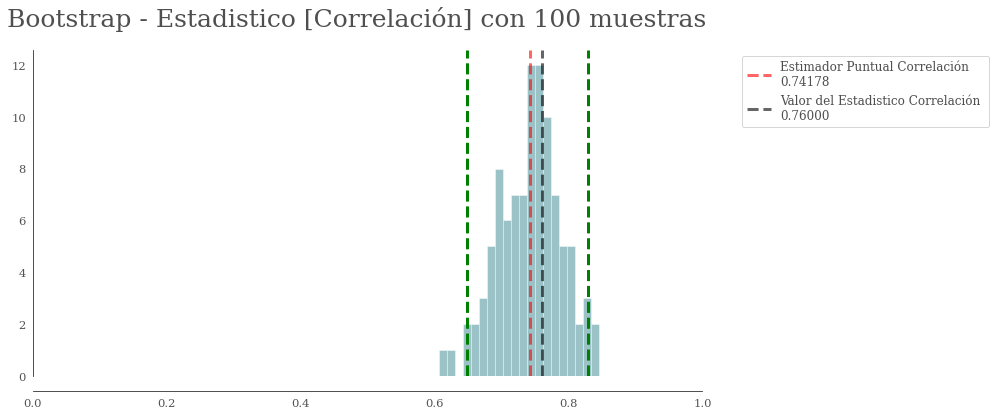

Promedio de la Muestra Bootstrap Correlación       =  0.74178
Valor del Estadistico Correlación                  =  0.76000
Error Estandar de la Muestra Bootstrap Correlación =  0.05060
Intervalo de Confianza                             =  (0.64865, 0.82871)


In [41]:
fig, ax = plt.subplots(figsize=(12, 6))
ax.hist(corr_3, bins = 20, color = '#056871', alpha = .4)

sns.despine(offset = {'bottom' : 15, 'left' : 0}, 
            trim = False)

plt.suptitle('Bootstrap - Estadistico [Correlación] con 100 muestras', color = '#4f4f4f', fontsize = 25, 
             fontfamily = 'serif')

est_puntual = np.mean(corr_3)
plt.axvline(est_puntual, linestyle="--",color = "red", linewidth=3, alpha=0.6, 
            label = f"Estimador Puntual Correlación \n{est_puntual:.5f}")

val_est = bd_escuelas[['LSAT', 'GPA']].corr().values[0,1]

plt.axvline(val_est, linestyle="--",color = "black", linewidth = 3, alpha=0.6, 
            label = f"Valor del Estadistico Correlación \n{val_est:.5f}")

plt.axvline(np.percentile(corr_3,2.5),color = "green", linestyle="--", linewidth = 3)                                                                                                                                                    
plt.axvline(np.percentile(corr_3,97.5),color = "green", linestyle="--", linewidth = 3) 

plt.xticks(x, fontsize = 11.5, fontfamily = 'serif', color = '#525252')
plt.yticks(fontsize = 11.5, fontfamily = 'serif', color = '#525252')

leg = plt.legend(fontsize = 12, bbox_to_anchor=(1.05, 1))

for i in range(2):
    leg.texts[i].set_color('#4f4f4f')
    leg.texts[i].set_family('serif')

plt.show()

print(f"Promedio de la Muestra Bootstrap Correlación       = {np.mean(corr_3): .5f}")
print(f"Valor del Estadistico Correlación                  = {val_est: .5f}")
print(f'Error Estandar de la Muestra Bootstrap Correlación = {(1 - est_puntual**2)/np.sqrt(bd_escuelas.shape[0] - 3): .5f}')
print(f'Intervalo de Confianza                             =  ({np.percentile(corr_3,2.5):.5f},{np.percentile(corr_3,97.5): .5f})')

In [42]:
k = 10000    # 20,000 mueestras bootstrap

corr_4 = np.zeros(k)

for j in range(k):
    corr_4[j] = bd_escuelas.sample(bd_escuelas.shape[0], replace = True)[['LSAT', 'GPA']].corr().values[0,1]

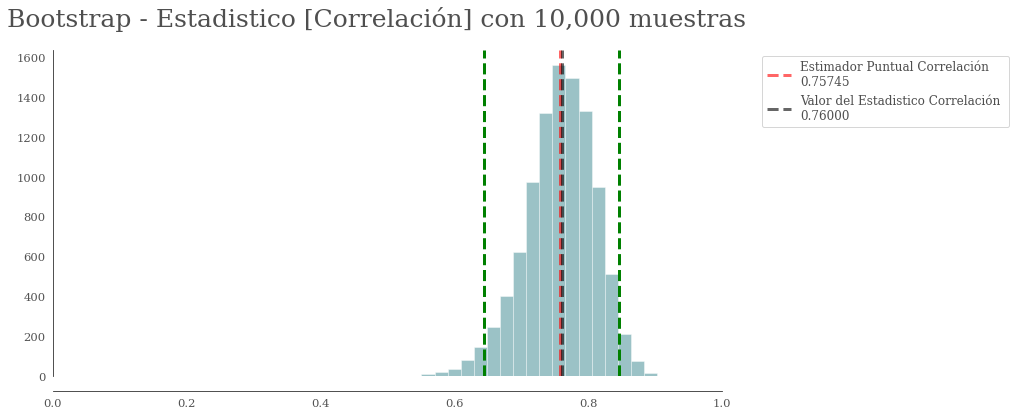

Promedio de la Muestra Bootstrap Correlación       =  0.75745
Valor del Estadistico Correlación                  =  0.76000
Error Estandar de la Muestra Bootstrap Correlación =  0.04796
Intervalo de Confianza                             =  (0.64429, 0.84602)


In [43]:
fig, ax = plt.subplots(figsize=(12, 6))
ax.hist(corr_4, bins = 20, color = '#056871', alpha = .4)

sns.despine(offset = {'bottom' : 15, 'left' : 0}, 
            trim = False)

plt.suptitle('Bootstrap - Estadistico [Correlación] con 10,000 muestras', color = '#4f4f4f', fontsize = 25, 
             fontfamily = 'serif')

est_puntual = np.mean(corr_4)
plt.axvline(est_puntual, linestyle="--",color = "red", linewidth=3, alpha=0.6, 
            label = f"Estimador Puntual Correlación \n{est_puntual:.5f}")

val_est = bd_escuelas[['LSAT', 'GPA']].corr().values[0,1]

plt.axvline(val_est, linestyle="--",color = "black", linewidth = 3, alpha=0.6, 
            label = f"Valor del Estadistico Correlación \n{val_est:.5f}")

plt.axvline(np.percentile(corr_4,2.5),color = "green", linestyle="--", linewidth = 3)                                                                                                                                                    
plt.axvline(np.percentile(corr_4,97.5),color = "green", linestyle="--", linewidth = 3) 

plt.xticks(x, fontsize = 11.5, fontfamily = 'serif', color = '#525252')
plt.yticks(fontsize = 11.5, fontfamily = 'serif', color = '#525252')

leg = plt.legend(fontsize = 12, bbox_to_anchor=(1.05, 1))

for i in range(2):
    leg.texts[i].set_color('#4f4f4f')
    leg.texts[i].set_family('serif')

plt.show()

print(f"Promedio de la Muestra Bootstrap Correlación       = {np.mean(corr_4): .5f}")
print(f"Valor del Estadistico Correlación                  = {val_est: .5f}")
print(f'Error Estandar de la Muestra Bootstrap Correlación = {(1 - est_puntual**2)/np.sqrt(bd_escuelas.shape[0] - 3): .5f}')
print(f'Intervalo de Confianza                             =  ({np.percentile(corr_4,2.5):.5f},{np.percentile(corr_4,97.5): .5f})')

# Jack - Knife sobre la población total 

In [44]:
k = bd_escuelas.shape[0]    # 20,000 mueestras bootstrap

corr_5 = np.zeros(k)
for j in range(1,k-1):
    corr_5[j] = bd_escuelas.loc[j:, ['LSAT', 'GPA']].corr().values[0,1]

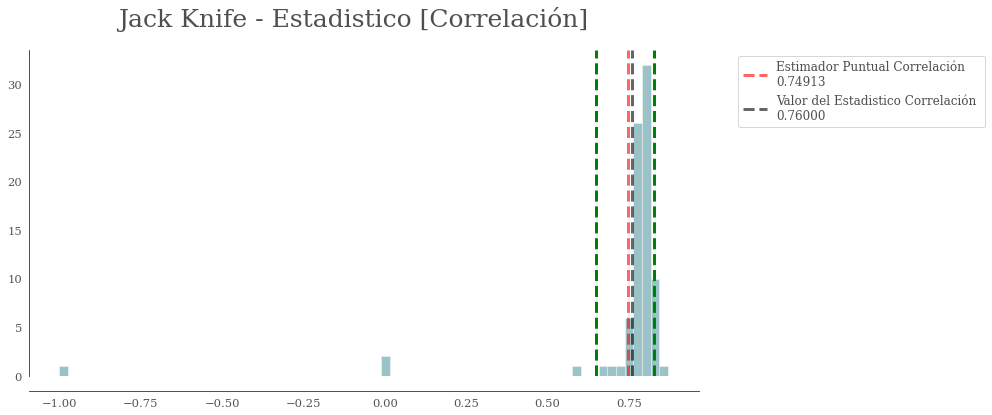

Promedio de la Muestra Jack Knife Correlación      =  0.74913
Valor del Estadistico Correlación                  =  0.76000
Error Estandar de la Muestra Jack Nife Correlación =  0.12667
Intervalo de Confianza                             =  (0.01476, 0.83524)


In [45]:
fig, ax = plt.subplots(figsize=(12, 6))
ax.hist(corr_5, bins = 70, color = '#056871', alpha = .4)

sns.despine(offset = {'bottom' : 15, 'left' : 0})

plt.suptitle('Jack Knife - Estadistico [Correlación]', color = '#4f4f4f', fontsize = 25, 
             fontfamily = 'serif')

est_puntual = np.mean(corr_5)
plt.axvline(est_puntual, linestyle="--",color = "red", linewidth = 3, alpha = 0.6, 
            label = f"Estimador Puntual Correlación \n{est_puntual:.5f}")

val_est = bd_escuelas[['LSAT', 'GPA']].corr().values[0,1]

plt.axvline(val_est, linestyle="--",color = "black", linewidth = 3, alpha=0.6, 
            label = f"Valor del Estadistico Correlación \n{val_est:.5f}")

plt.axvline(np.percentile(corr_3,2.5),color = "green", linestyle="--", linewidth = 3)                                                                                                                                                    
plt.axvline(np.percentile(corr_3,97.5),color = "green", linestyle="--", linewidth = 3) 

plt.xticks(fontsize = 11.5, fontfamily = 'serif', color = '#525252')
plt.yticks(fontsize = 11.5, fontfamily = 'serif', color = '#525252')

leg = plt.legend(fontsize = 12, bbox_to_anchor=(1.05, 1))

for i in range(2):
    leg.texts[i].set_color('#4f4f4f')
    leg.texts[i].set_family('serif')

plt.show()

print(f"Promedio de la Muestra Jack Knife Correlación      = {np.mean(corr_5): .5f}")
print(f"Valor del Estadistico Correlación                  = {val_est: .5f}")
print(f'Error Estandar de la Muestra Jack Nife Correlación = {(1 - est_puntual**2)/np.sqrt(tabla.shape[0] - 3): .5f}')
print(f'Intervalo de Confianza                             =  ({np.percentile(corr_5,2.5):.5f},{np.percentile(corr_5,97.5): .5f})')

-------
De esto que podemos obtener ? 

Que el estimador de la correlacion de la poblacio total es de : **0.76**

Y el estimador de la muestra de 15 arrojaba                   : **0.80938** por lo que la muestra no era tan representativa, además  de que los estimadores puntuales de las simulaciones bootstrap sobre la muestra de 15 datos nos marcaron valores de **0.79852** y **0.80765** muy cercanos a la correlacion de la muestra de 15.

También notamos que el Bootstrap respecto a la población total mientras más simulabamos pues el estimador puntual se acercaba más al estadistico.

Y sobre bootstrap se trabajó sobre la poblacion parece haber trabajado bien, nos marcó un valor de **0.74913** cercano al **0.76** 

------
------
## Problema 3

In [46]:
from sklearn.linear_model import LinearRegression

In [47]:
X = bd_escuelas[['LSAT']]
y = bd_escuelas[['GPA']]

reg = LinearRegression()
reg.fit(X, y)

LinearRegression()

In [49]:
y_hat = reg.predict(X).reshape(-1)
x = X.to_numpy().reshape(-1)

y_real = y.to_numpy().reshape(-1)
n = len(y_real)
residuals = y_real - y_hat

In [50]:
X_with_intercept = np.empty(shape=(n, 2))
X_with_intercept[:, 0] = 1
X_with_intercept[:, 1] = x

Podemos obtener el error estándar del estimador de la siguiente manera
$$
\begin{equation}
\widehat{se}_{\beta_{0,1}}= \sqrt{(X^{T}X)^{-1}\hat{\sigma}^{2}}
\end{equation}
$$

donde 

$$
\begin{equation}
\hat{\sigma}^{2}= \frac{e^{T} e}{n-2} 
\end{equation}
$$

In [51]:
residual_sum_of_squares = residuals.T @ residuals
sigma_squared_hat = residual_sum_of_squares / (n - 2)
var_beta_hat = np.linalg.inv(X_with_intercept.T @ X_with_intercept) * sigma_squared_hat
for p_ in range(2):
    standard_error = var_beta_hat[p_, p_] ** 0.5
    print(f"SE(beta_hat[{p_}]): {standard_error}")

SE(beta_hat[0]): 0.21421814196716396
SE(beta_hat[1]): 0.0003577625024658633


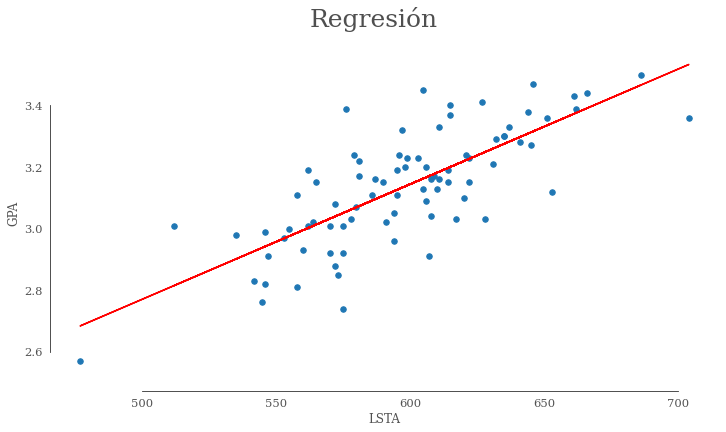

In [53]:
fig, ax = plt.subplots(figsize=(12, 6))
plt.scatter(X, y,s = 30)
plt.plot(x, y_hat, color='red')

plt.suptitle('Regresión', color = '#4f4f4f', fontsize = 25, 
             fontfamily = 'serif')

sns.despine(offset = {'bottom' : 15, 'left' : 0}, 
            trim = True)

plt.xlabel("LSTA", fontsize = 12, fontfamily = 'serif', color = '#525252')
plt.ylabel("GPA", fontsize = 12, fontfamily = 'serif', color = '#525252')
plt.xticks(fontsize = 11.5, fontfamily = 'serif', color = '#525252')
plt.yticks(fontsize = 11.5, fontfamily = 'serif', color = '#525252')

plt.show()

In [55]:
df = pd.DataFrame(residuals, columns=['residual'])
df["x"] = x

In [56]:
simul = 10000
res_boost = np.zeros((simul,2))

for i in range(0,simul):
    df_aux = df.sample(n, replace = True)
    
    x_i = df_aux[["x"]].to_numpy().reshape(-1)
    r_i = df_aux[["residual"]].to_numpy().reshape(-1)
    
    X_with_intercept_ = np.empty(shape = (n, 2))
    X_with_intercept_[:, 0] = 1
    X_with_intercept_[:, 1] = x_i
    
    residual_sum_of_squares_ = r_i.T @ r_i
    sigma_squared_hat_ = residual_sum_of_squares_ / (n - 2)
    var_beta_hat_ = np.linalg.inv(X_with_intercept_.T @ X_with_intercept_) * sigma_squared_hat_

    res_boost[i,0] = var_beta_hat_[0, 0] ** 0.5
    res_boost[i,1] = var_beta_hat_[1, 1] ** 0.5

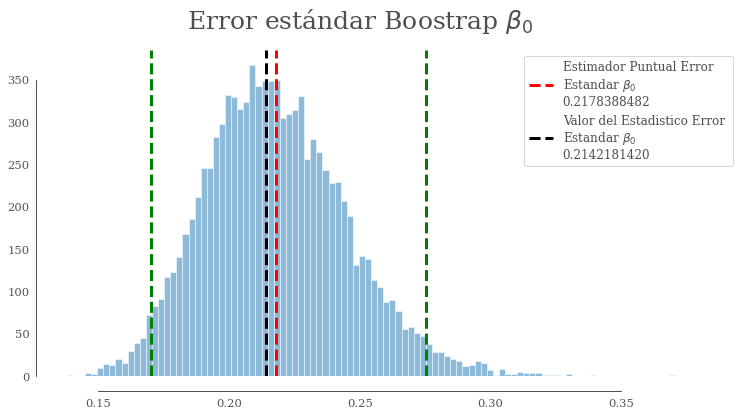

Error Estándar sin Bootsrap                         = 0.21421814196716396
Promedio de Error Estándar de la muestras Bootstrap = 0.21783884821885513
Intervalo de Confianza                              = (0.17012, 0.27531)




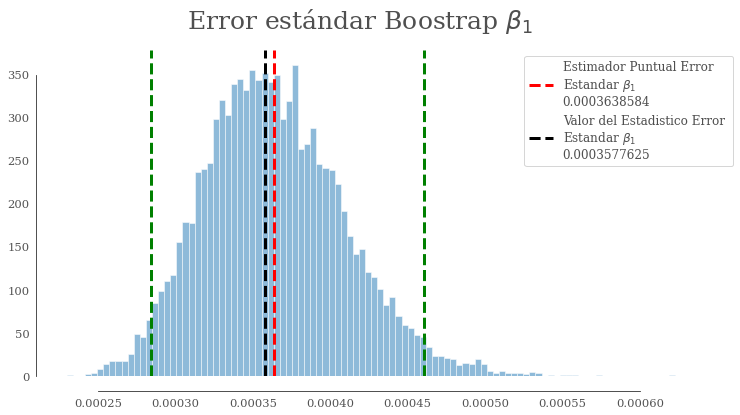

Error Estándar sin Bootsrap                         = 0.0003577625024658633
Promedio de Error Estándar de la muestras Bootstrap = 0.0003638584041183656
Intervalo de Confianza                              = (0.00028, 0.00046)


In [57]:
for i in range(2):    
    print('\n')
    fig, ax = plt.subplots(figsize=(12, 6))

    plt.suptitle("Error estándar Boostrap " + r'$\beta_{}$'.format(i), color = '#4f4f4f', fontsize = 25, 
                 fontfamily = 'serif')

    plt.hist(res_boost[:,i], bins = 100, alpha = 0.5, edgecolor = "white")

    #plt.axvline(x = err_reg, color = 'black', linestyle='--', linewidth = 3, 
    #            label = f"Estimador Puntual Error Estandar r'\beta ' \n{np.mean(res_boost):.5f}")
    plt.axvline(x = np.mean(res_boost[:,i]), color = 'red', linestyle='--', linewidth = 3, 
                label = "Estimador Puntual Error \nEstandar " + r'$\beta_{}$'.format(i) + f'\n{np.mean(res_boost[:,i]):.10f}')

    plt.axvline(x = var_beta_hat[i,i] ** 0.5, color='black', linestyle='--', linewidth = 3,
                label = f"Valor del Estadistico Error \nEstandar " + r'$\beta_{}$'.format(i) + f'\n{var_beta_hat[i,i] ** 0.5:.10f}')

    plt.axvline(np.percentile(res_boost[:,i],2.5), color = "green", linestyle="--",linewidth = 3)                                                                                                                                                    
    plt.axvline(np.percentile(res_boost[:,i],97.5), color = "green", linestyle="--",linewidth = 3) 

    sns.despine(offset = {'bottom' : 15, 'left' : 0},  trim = True)

    plt.xticks(fontsize = 11.5, fontfamily = 'serif', color = '#525252')
    plt.yticks(fontsize = 11.5, fontfamily = 'serif', color = '#525252')

    leg = plt.legend(fontsize = 12, bbox_to_anchor=(1.05, 1)) 

    for j in range(2):
        leg.texts[j].set_color('#4f4f4f')
        leg.texts[j].set_family('serif')

    plt.show()
    print("Error Estándar sin Bootsrap                         =", var_beta_hat[i,i] ** 0.5)
    print("Promedio de Error Estándar de la muestras Bootstrap =", np.mean(res_boost[:,i]))
    print(f'Intervalo de Confianza                              = ({np.percentile(res_boost[:,i],2.5):.5f},{np.percentile(res_boost[:,i],97.5): .5f})')